In [1]:
# Para utilizar recursos do sistema
import os
import sys
import numpy as np

# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing

# Para criar DF vazio
import pandas as pd

# Para plot
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
## Observando a versão do Dask
!pip show dask

Name: dask
Version: 2022.2.1
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: 
Author-email: 
License: BSD
Location: c:\users\andre\anaconda3\lib\site-packages
Requires: cloudpickle, fsspec, packaging, partd, pyyaml, toolz
Required-by: datashader, distributed, intake


In [3]:
## Definindo caminho para as bases
path = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK"
print(path)

C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK


In [4]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Executável:
C:\Users\andre\anaconda3\python.exe

Versão do Python:
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [5]:
set_up1 = '4 workers, 1 thread por worker, 1GB limite de memória'
set_up2 = '6 workers, 1 thread por worker, 2GB limite de memória'

In [6]:
## Definindo os clusters
client = Client(n_workers=6, threads_per_worker=1, memory_limit='2GB')

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 6,Total memory: 11.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64594,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 6
Started: Just now,Total memory: 11.18 GiB
Comm: tcp://127.0.0.1:64648,Total threads: 1
Dashboard: http://127.0.0.1:64649/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:64599,


In [8]:
## Lista com os arquivos na pasta de importação
files = os.listdir(path)
files

['avon-and-somerset-outcomes.csv',
 'avon-and-somerset-stop-and-search.csv',
 'avon-and-somerset-street.csv',
 'bedfordshire-outcomes.csv',
 'bedfordshire-stop-and-search.csv',
 'bedfordshire-street.csv',
 'btp-stop-and-search.csv',
 'btp-street.csv',
 'cambridgeshire-outcomes.csv',
 'cambridgeshire-stop-and-search.csv',
 'cambridgeshire-street.csv',
 'cheshire-outcomes.csv',
 'cheshire-stop-and-search.csv',
 'cheshire-street.csv',
 'city-of-london-outcomes.csv',
 'city-of-london-stop-and-search.csv',
 'city-of-london-street.csv',
 'cleveland-outcomes.csv',
 'cleveland-stop-and-search.csv',
 'cleveland-street.csv',
 'cumbria-outcomes.csv',
 'cumbria-stop-and-search.csv',
 'cumbria-street.csv',
 'derbyshire-outcomes.csv',
 'derbyshire-stop-and-search.csv',
 'derbyshire-street.csv',
 'devon-and-cornwall-outcomes.csv',
 'devon-and-cornwall-stop-and-search.csv',
 'devon-and-cornwall-street.csv',
 'dorset-outcomes.csv',
 'dorset-stop-and-search.csv',
 'dorset-street.csv',
 'durham-outcomes.

In [9]:
path_outcomes = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\Outcomes"
path_street = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\Street"
path_stse = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\StopAndSearch"

In [10]:
files_out = os.listdir(path_outcomes)
files_out

['avon-and-somerset-outcomes.csv',
 'bedfordshire-outcomes.csv',
 'cambridgeshire-outcomes.csv',
 'cheshire-outcomes.csv',
 'city-of-london-outcomes.csv',
 'cleveland-outcomes.csv',
 'cumbria-outcomes.csv',
 'derbyshire-outcomes.csv',
 'devon-and-cornwall-outcomes.csv',
 'dorset-outcomes.csv',
 'durham-outcomes.csv',
 'dyfed-powys-outcomes.csv',
 'essex-outcomes.csv',
 'gloucestershire-outcomes.csv',
 'greater-manchester-outcomes.csv',
 'gwent-outcomes.csv',
 'hampshire-outcomes.csv',
 'hertfordshire-outcomes.csv',
 'humberside-outcomes.csv',
 'kent-outcomes.csv',
 'lancashire-outcomes.csv',
 'leicestershire-outcomes.csv',
 'merseyside-outcomes.csv',
 'metropolitan-outcomes.csv',
 'norfolk-outcomes.csv',
 'north-wales-outcomes.csv',
 'north-yorkshire-outcomes.csv',
 'northamptonshire-outcomes.csv',
 'northumbria-outcomes.csv',
 'nottinghamshire-outcomes.csv',
 'south-wales-outcomes.csv',
 'south-yorkshire-outcomes.csv',
 'staffordshire-outcomes.csv',
 'suffolk-outcomes.csv',
 'surrey-o

In [11]:
avon_and_somerset_outcomes = []
bedfordshire_outcomes = []
cambridgeshire_outcomes = []
cheshire_outcomes = []
city_of_london_outcomes = []
cleveland_outcomes = []
cumbria_outcomes = []
derbyshire_outcomes = []
devon_and_cornwall_outcomes = []
dorset_outcomes = []
durham_outcomes = []
dyfed_powys_outcomes = []
essex_outcomes = []
gloucestershire_outcomes = []
greater_manchester_outcomes = []
gwent_outcomes = []
hampshire_outcomes = []
hertfordshire_outcomes = []
humberside_outcomes = []
kent_outcomes = []
lancashire_outcomes = []
leicestershire_outcomes = []
merseyside_outcomes = []
metropolitan_outcomes = []
norfolk_outcomes = []
north_wales_outcomes = []
north_yorkshire_outcomes = []
northamptonshire_outcomes = []
northumbria_outcomes = []
nottinghamshire_outcomes = []
south_wales_outcomes = []
south_yorkshire_outcomes = []
staffordshire_outcomes = []
suffolk_outcomes = []
surrey_outcomes = []
sussex_outcomes = []
thames_valley_outcomes = []
warwickshire_outcomes = []
west_mercia_outcomes = []
west_midlands_outcomes = []
west_yorkshire_outcomes = []
wiltshire_outcomes = []

In [12]:
nome_dfs = [avon_and_somerset_outcomes,
            bedfordshire_outcomes,
            cambridgeshire_outcomes,
            cheshire_outcomes,
            city_of_london_outcomes,
            cleveland_outcomes,
            cumbria_outcomes,
            derbyshire_outcomes,
            devon_and_cornwall_outcomes,
            dorset_outcomes,
            durham_outcomes,
            dyfed_powys_outcomes,
            essex_outcomes,
            gloucestershire_outcomes,
            greater_manchester_outcomes,
            gwent_outcomes,
            hampshire_outcomes,
            hertfordshire_outcomes,
            humberside_outcomes,
            kent_outcomes,
            lancashire_outcomes,
            leicestershire_outcomes,
            merseyside_outcomes,
            metropolitan_outcomes,
            norfolk_outcomes,
            north_wales_outcomes,
            north_yorkshire_outcomes,
            northamptonshire_outcomes,
            northumbria_outcomes,
            nottinghamshire_outcomes,
            south_wales_outcomes,
            south_yorkshire_outcomes,
            staffordshire_outcomes,
            suffolk_outcomes,
            surrey_outcomes,
            sussex_outcomes,
            thames_valley_outcomes,
            warwickshire_outcomes,
            west_mercia_outcomes,
            west_midlands_outcomes,
            west_yorkshire_outcomes,
            wiltshire_outcomes]

In [13]:
nome_cidades = ['avon and somerset',
            'bedfordshire',
            'cambridgeshire',
            'cheshire',
            'city of london',
            'cleveland',
            'cumbria',
            'derbyshire',
            'devon and cornwall',
            'dorset',
            'durham',
            'dyfed powys',
            'essex',
            'gloucestershire',
            'greater manchester',
            'gwent',
            'hampshire',
            'hertfordshire',
            'humberside',
            'kent',
            'lancashire',
            'leicestershire',
            'merseyside',
            'metropolitan',
            'norfolk',
            'north wales',
            'north yorkshire',
            'northamptonshire',
            'northumbria',
            'nottinghamshire',
            'south wales',
            'south yorkshire',
            'staffordshire',
            'suffolk',
            'surrey',
            'sussex',
            'thames valley',
            'warwickshire',
            'west mercia',
            'west midlands',
            'west yorkshire',
            'wiltshire']

In [14]:
%%time 
## Medindo o tempo para rodar a célula.
outcomes = pd.DataFrame()
## Lista vazia para retornar dfs com infos
## loop com as listas criadas, para cada arquivo na pasta será rodado o for, que importará o
## arquivo e colocará o nome da cidade em uma nova coluna, posteriormente os arquivos serão
## empilhados para facilitar o trabalho da dupla
for file,df,city in zip(files_out,nome_dfs,nome_cidades):
    ## Leitura do arquivo excel
    df = dd.read_csv(os.path.join(path_outcomes,file),
                     dtype={'LSOA code': 'object',
                            'LSOA name': 'object',
                            'Longitude': 'object',
                            'Latitude': 'object'})
    ## criando coluna 'cidade" e incluindo a cidade correspondente
    df['cidade'] = city
    ## Adicionando DF na lista
    outcomes = dd.concat([outcomes, df], ignore_index = True)


CPU times: total: 359 ms
Wall time: 2.83 s


In [15]:
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,cidade
108759,410f31e49c5fa09d99f8256e31f37e99fb7d9187afc5f1...,2022-02,Wiltshire Police,Wiltshire Police,-1.740986,51.563574,On or near TYNEHAM ROAD,E01015486,Swindon 013F,Unable to prosecute suspect,wiltshire
108760,6f86bfbe8ae1d6cb29c9f2563e68a6331797b3e268a183...,2022-02,Wiltshire Police,Wiltshire Police,-1.763702,51.581371,On or near CONSTABLE ROAD,E01015560,Swindon 005F,Unable to prosecute suspect,wiltshire
108761,7306f17140e540daeff994a69739e429685229825d98bc...,2022-02,Wiltshire Police,Wiltshire Police,-2.132944,51.339858,On or near Parking Area,E01032077,Wiltshire 030A,Suspect charged,wiltshire
108762,cc2eab0e23d8665e36a52f728fc59980b3e70dd2252e96...,2022-02,Wiltshire Police,Wiltshire Police,-1.995054,51.351524,On or near ST JOHN'S STREET,E01031854,Wiltshire 026B,Suspect charged,wiltshire
108763,9a675d682b8144177ae81d86d697cacdce62d31b96a971...,2022-02,Wiltshire Police,Wiltshire Police,-1.989224,51.352782,On or near Supermarket,E01031850,Wiltshire 025A,Suspect charged,wiltshire


In [16]:
%%time
ocor_cidades = outcomes.cidade.value_counts().compute()
ocor_cidades

CPU times: total: 22.5 s
Wall time: 3min 38s


metropolitan          1765886
west yorkshire         796932
west midlands          623318
kent                   524401
essex                  468086
thames valley          467599
hampshire              445613
merseyside             428343
south yorkshire        399509
lancashire             394395
sussex                 330655
humberside             308571
south wales            300772
nottinghamshire        287622
northumbria            280889
leicestershire         263198
west mercia            236757
staffordshire          236063
devon and cornwall     235954
derbyshire             235029
avon and somerset      234022
cheshire               232995
hertfordshire          229197
surrey                 211549
dorset                 209416
cleveland              203595
cambridgeshire         191751
norfolk                190226
northamptonshire       179889
north yorkshire        175916
durham                 174577
north wales            156537
suffolk                153633
bedfordshi

In [17]:
print(f'Tempo no set up 1 ({set_up1}), foi de 9min 36s')
print(f'Tempo no set up 2 ({set_up2}), foi 5min 5s')

Tempo no set up 1 (4 workers, 1 thread por worker, 1GB limite de memória), foi de 9min 36s
Tempo no set up 2 (6 workers, 1 thread por worker, 2GB limite de memória), foi 5min 5s


In [18]:
outcomes = outcomes.drop(['Longitude','Latitude','LSOA code', 'LSOA name'], axis=1)

In [19]:
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Location,Outcome type,cidade
108759,410f31e49c5fa09d99f8256e31f37e99fb7d9187afc5f1...,2022-02,Wiltshire Police,Wiltshire Police,On or near TYNEHAM ROAD,Unable to prosecute suspect,wiltshire
108760,6f86bfbe8ae1d6cb29c9f2563e68a6331797b3e268a183...,2022-02,Wiltshire Police,Wiltshire Police,On or near CONSTABLE ROAD,Unable to prosecute suspect,wiltshire
108761,7306f17140e540daeff994a69739e429685229825d98bc...,2022-02,Wiltshire Police,Wiltshire Police,On or near Parking Area,Suspect charged,wiltshire
108762,cc2eab0e23d8665e36a52f728fc59980b3e70dd2252e96...,2022-02,Wiltshire Police,Wiltshire Police,On or near ST JOHN'S STREET,Suspect charged,wiltshire
108763,9a675d682b8144177ae81d86d697cacdce62d31b96a971...,2022-02,Wiltshire Police,Wiltshire Police,On or near Supermarket,Suspect charged,wiltshire


In [20]:
outcomes = outcomes.rename(columns = {'Crime ID':'ID','Reported by':'reported_by',
                                      'Falls within':'falls_within',
                                      'Outome type':'outcome'
                                     })


In [21]:
%time
meses = outcomes.Month.value_counts().to_frame("Crimes").reset_index().compute()
meses

CPU times: total: 0 ns
Wall time: 0 ns


,index,Crimes
0,2020-03,475666
1,2020-04,461197
2,2020-11,420776
3,2021-07,394116
4,2022-01,393508
5,2020-10,384283
6,2020-09,382091
7,2021-01,371982
8,2021-06,362148
9,2020-07,359124


In [22]:
meses = meses.rename(columns={'index':'month'})
meses.head()

,month,Crimes
0,2020-03,475666
1,2020-04,461197
2,2020-11,420776
3,2021-07,394116
4,2022-01,393508


In [23]:
meses.month = pd.to_datetime(meses.month)
meses.head()

,month,Crimes
0,2020-03-01,475666
1,2020-04-01,461197
2,2020-11-01,420776
3,2021-07-01,394116
4,2022-01-01,393508


In [24]:
meses = meses.sort_values(by = ['month'])
meses.head()

,month,Crimes
35,2019-03-01,217216
34,2019-04-01,276886
31,2019-05-01,309374
30,2019-06-01,312643
28,2019-07-01,316785


In [25]:
meses1 = meses.reset_index()
# meses1 = meses1.drop(['level_0', 'index'], axis = 1)
meses1.head()

,index,month,Crimes
0,35,2019-03-01,217216
1,34,2019-04-01,276886
2,31,2019-05-01,309374
3,30,2019-06-01,312643
4,28,2019-07-01,316785


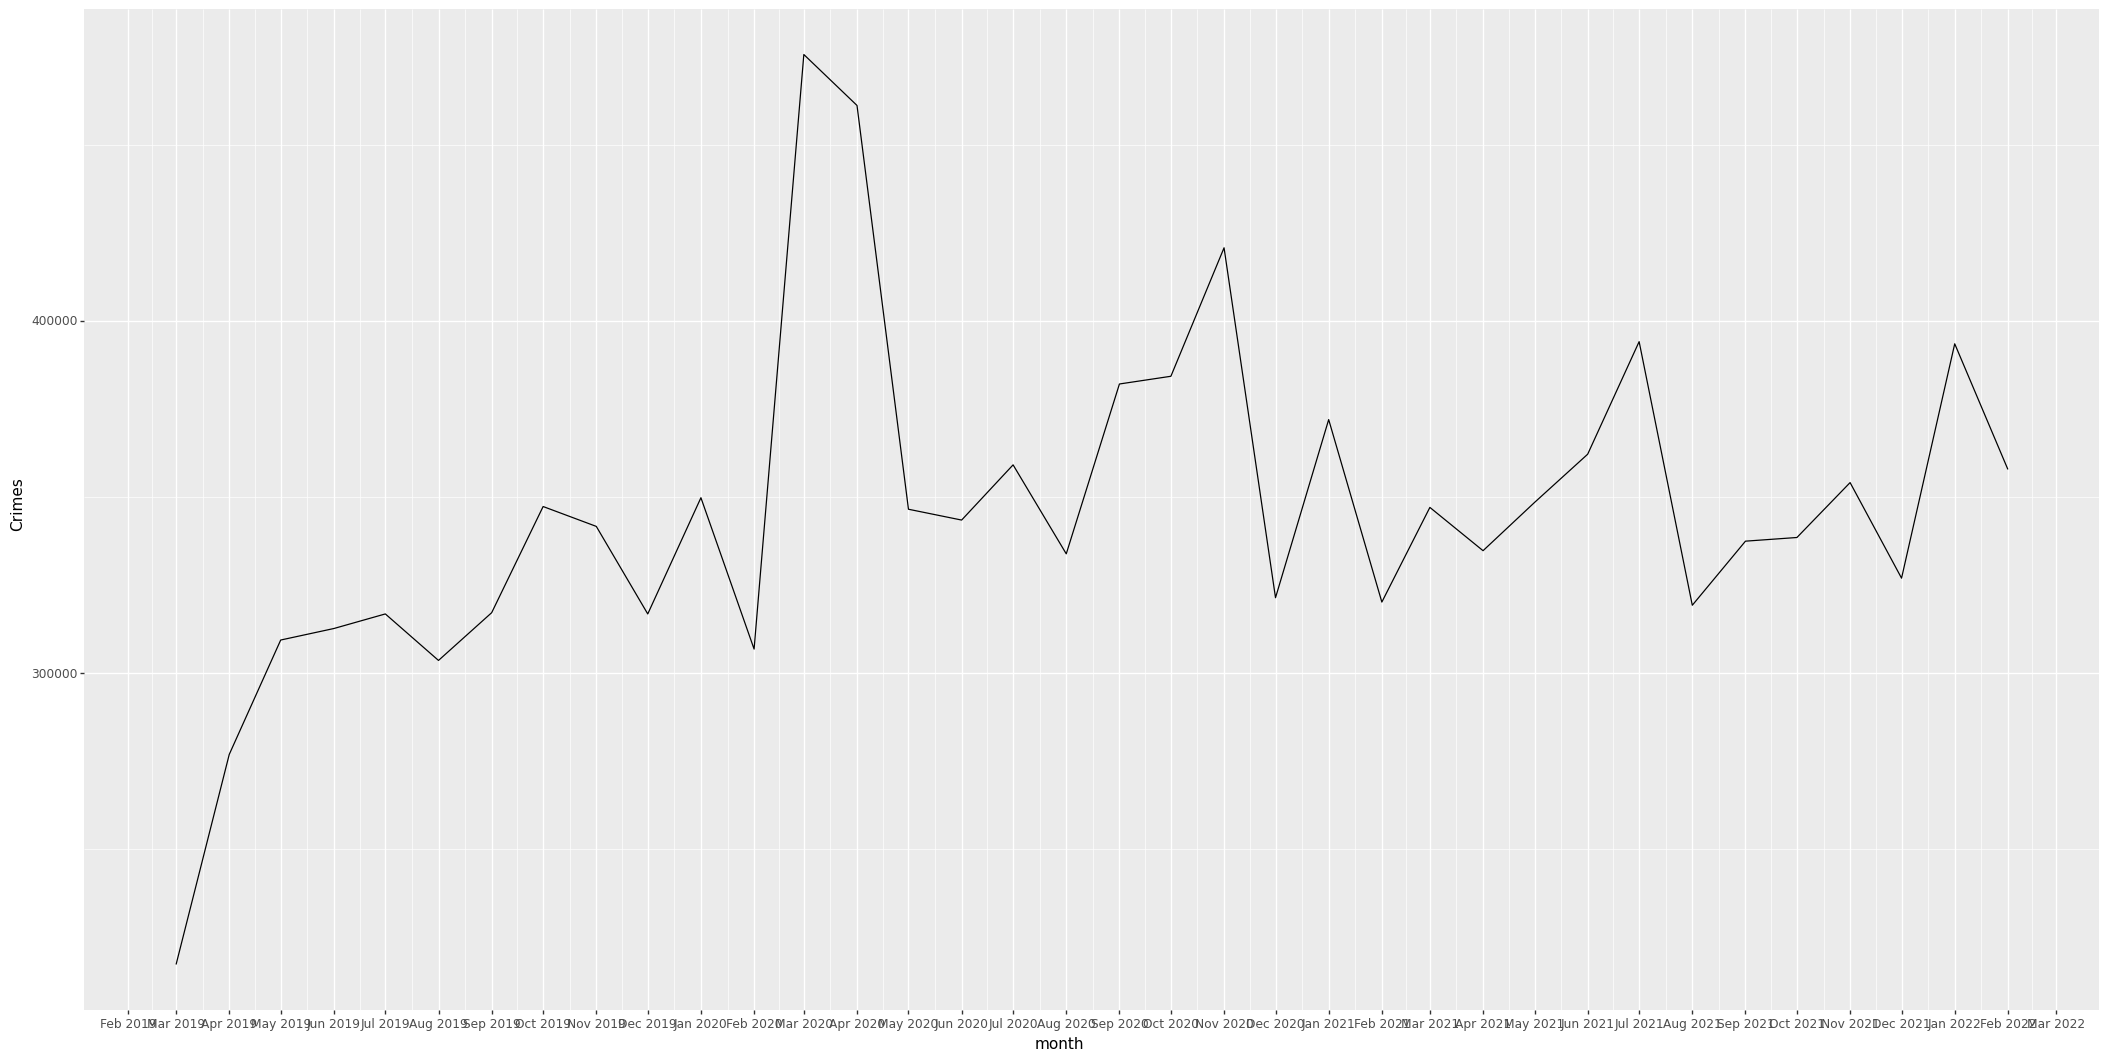

<ggplot: (101059143596)>

In [26]:
(ggplot(meses1, aes(x = "month", y = "Crimes")) +
     geom_line() +
     theme(figure_size=(26, 13)) +
     scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y"))

### Meses com o maior resolução de crimes, seja resolução boa (prendendo o criminoso) ou ruim (não encontrando o responsável)
* Março e Abril de 2020
* Setembro, Outubro e Novembro de 2020
* Junho e Julho de 2021
* Janeiro de 2022

Observando os meses dos gráficos com maior pico e o gráfico em si, não encontramos relação entre as resoluções dos crimes e os meses dos anos.

In [28]:
outcomes_testes = outcomes.get_partition(2)

In [29]:
%time
outcomes_city = (outcomes.groupby(['cidade','Outcome type']).size()
                 .compute().to_frame('count').reset_index())

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
outcomes_city.loc[outcomes_city.cidade == 'wiltshire']

,cidade,Outcome type,count
921,wiltshire,Action to be taken by another organisation,2171
922,wiltshire,Court case unable to proceed,10
923,wiltshire,Defendant found not guilty,2
924,wiltshire,Defendant sent to Crown Court,1
925,wiltshire,Formal action is not in the public interest,364
926,wiltshire,Further investigation is not in the public int...,1107
927,wiltshire,Investigation complete; no suspect identified,41458
928,wiltshire,Local resolution,1111
929,wiltshire,Offender deprived of property,1
930,wiltshire,Offender fined,25


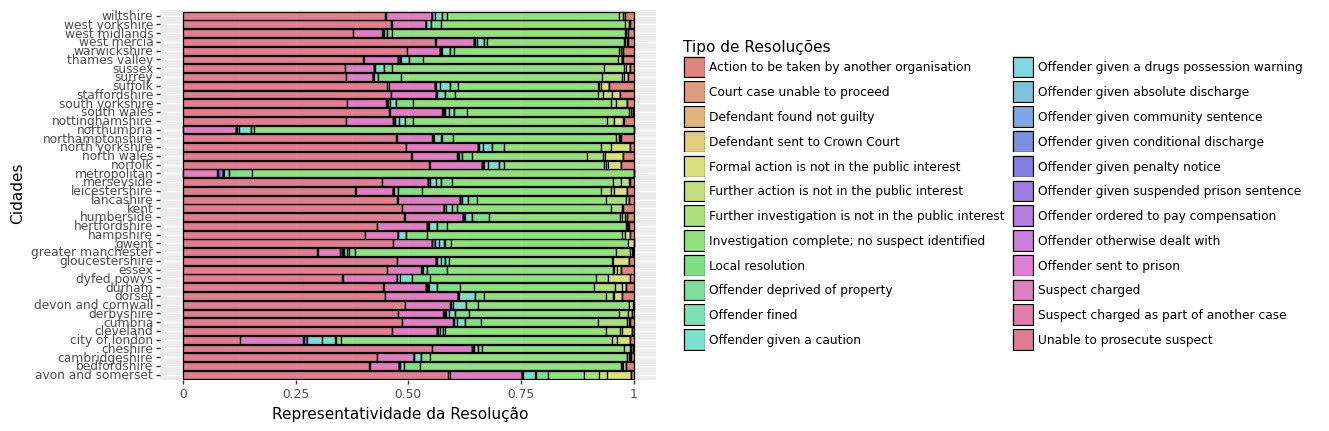

<ggplot: (101059142660)>

In [31]:
(ggplot(outcomes_city, aes(x = 'cidade', y = 'count', fill = 'Outcome type')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Cidades', y = 'Representatividade da Resolução', fill = 'Tipo de Resoluções') +
                       coord_flip())

O gráfico acima nos mostra uma predominânica de 2 tipos de reoluções onde as autoridades não foram capazes de processar o suspeito e investigação completa sem suspeito identificado. Isso mostrou ao grupo uma forte inpunidade e ineficiência da policia britânica nos últimos anos. A terceira resolução mais aparente no gráfico é suspeito acusado, mas ainda sim uma quantidade baixa de suspeitos acusados se levarmos em conta os crimes não resolvidos.

In [32]:
%%time
respon = outcomes.falls_within.value_counts().compute()
respon

CPU times: total: 8.31 s
Wall time: 2min 18s


Metropolitan Police Service       1765886
West Yorkshire Police              796932
West Midlands Police               623318
Kent Police                        524401
Essex Police                       468086
Thames Valley Police               467599
Hampshire Constabulary             445613
Merseyside Police                  428343
South Yorkshire Police             399509
Lancashire Constabulary            394395
Sussex Police                      330655
Humberside Police                  308571
South Wales Police                 300772
Nottinghamshire Police             287622
Northumbria Police                 280889
Leicestershire Police              263198
West Mercia Police                 236757
Staffordshire Police               236063
Devon & Cornwall Police            235954
Derbyshire Constabulary            235029
Avon and Somerset Constabulary     234022
Cheshire Constabulary              232995
Hertfordshire Constabulary         229197
Surrey Police                     

In [33]:
%%time
report = outcomes.reported_by.value_counts().compute()
report

CPU times: total: 10.1 s
Wall time: 2min 22s


Metropolitan Police Service       1765886
West Yorkshire Police              796932
West Midlands Police               623318
Kent Police                        524401
Essex Police                       468086
Thames Valley Police               467599
Hampshire Constabulary             445613
Merseyside Police                  428343
South Yorkshire Police             399509
Lancashire Constabulary            394395
Sussex Police                      330655
Humberside Police                  308571
South Wales Police                 300772
Nottinghamshire Police             287622
Northumbria Police                 280889
Leicestershire Police              263198
West Mercia Police                 236757
Staffordshire Police               236063
Devon & Cornwall Police            235954
Derbyshire Constabulary            235029
Avon and Somerset Constabulary     234022
Cheshire Constabulary              232995
Hertfordshire Constabulary         229197
Surrey Police                     

As colunas de quem reportou o crime e quem é o responsável por cuidar do crime são iguais então podemos usar apenas uma delas.

In [34]:
print(pd.DataFrame(respon).shape[0])
print(pd.DataFrame(report).shape[0])
print(len(outcomes_city.cidade.unique().tolist()))

42
42
42


- Cada cidade tem a sua própria polícia por isso os números são os mesmos, assim não faz sentido fazer a análise de qual policía tem o maior índice de resolução de crimes mas faz sentido analisar em qual cidade temos o menos número de crimes e que tem a maior porcentagem de resolução de crimes

In [35]:
outcomes = outcomes.drop(['falls_within'], axis = 1)

In [36]:
%time
outcomes_repor = (outcomes.groupby(['reported_by','Outcome type']).size()
                 .compute().to_frame('count').reset_index())

CPU times: total: 0 ns
Wall time: 0 ns


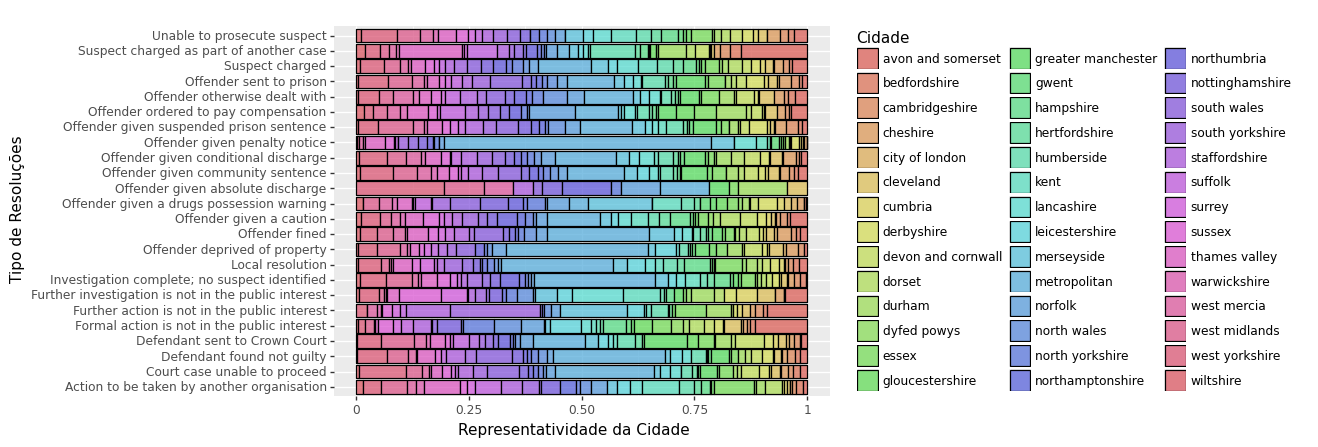

<ggplot: (101062429724)>

In [37]:
(ggplot(outcomes_city, aes(x = 'Outcome type', y = 'count', fill = 'cidade')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Tipo de Resoluções', y = 'Representatividade da Cidade',
                            fill = 'Cidade') +
                       coord_flip())

In [38]:
%time
total_crime = outcomes_city.groupby('cidade').sum().reset_index()
total_crime = total_crime.rename(columns = {'count':'total'}).sort_values('total').reset_index(drop = True)
total_crime

CPU times: total: 0 ns
Wall time: 0 ns


,cidade,total
0,city of london,15747
1,dyfed powys,62473
2,gwent,100978
3,greater manchester,103925
4,wiltshire,108764
5,cumbria,111071
6,warwickshire,113769
7,gloucestershire,115656
8,bedfordshire,145173
9,suffolk,153633


In [39]:
outcomes2 = outcomes_city.merge(total_crime, left_on = 'cidade', right_on = 'cidade', how = 'left')
outcomes2

,cidade,Outcome type,count,total
0,avon and somerset,Action to be taken by another organisation,1375,234022
1,avon and somerset,Court case unable to proceed,21,234022
2,avon and somerset,Defendant found not guilty,16,234022
3,avon and somerset,Defendant sent to Crown Court,13,234022
4,avon and somerset,Formal action is not in the public interest,12336,234022
...,...,...,...,...
938,wiltshire,Offender otherwise dealt with,2,108764
939,wiltshire,Offender sent to prison,27,108764
940,wiltshire,Suspect charged,10982,108764
941,wiltshire,Suspect charged as part of another case,181,108764


In [40]:
outcomes2.dtypes

cidade          object
Outcome type    object
count            int64
total            int64
dtype: object

In [41]:
%time
outcomes2 = outcomes2.assign(percent = outcomes2['count'].astype(int)/outcomes2.total.astype(int))
outcomes2

CPU times: total: 0 ns
Wall time: 0 ns


,cidade,Outcome type,count,total,percent
0,avon and somerset,Action to be taken by another organisation,1375,234022,0.005876
1,avon and somerset,Court case unable to proceed,21,234022,0.000090
2,avon and somerset,Defendant found not guilty,16,234022,0.000068
3,avon and somerset,Defendant sent to Crown Court,13,234022,0.000056
4,avon and somerset,Formal action is not in the public interest,12336,234022,0.052713
...,...,...,...,...,...
938,wiltshire,Offender otherwise dealt with,2,108764,0.000018
939,wiltshire,Offender sent to prison,27,108764,0.000248
940,wiltshire,Suspect charged,10982,108764,0.100971
941,wiltshire,Suspect charged as part of another case,181,108764,0.001664


In [42]:
outcomes2.style.format({
    'percent': '{:,.2%}'.format,
})

,cidade,Outcome type,count,total,percent
0,avon and somerset,Action to be taken by another organisation,1375,234022,0.59%
1,avon and somerset,Court case unable to proceed,21,234022,0.01%
2,avon and somerset,Defendant found not guilty,16,234022,0.01%
3,avon and somerset,Defendant sent to Crown Court,13,234022,0.01%
4,avon and somerset,Formal action is not in the public interest,12336,234022,5.27%
5,avon and somerset,Further action is not in the public interest,4398,234022,1.88%
6,avon and somerset,Further investigation is not in the public interest,7692,234022,3.29%
7,avon and somerset,Investigation complete; no suspect identified,18822,234022,8.04%
8,avon and somerset,Local resolution,6267,234022,2.68%
9,avon and somerset,Offender deprived of property,2,234022,0.00%


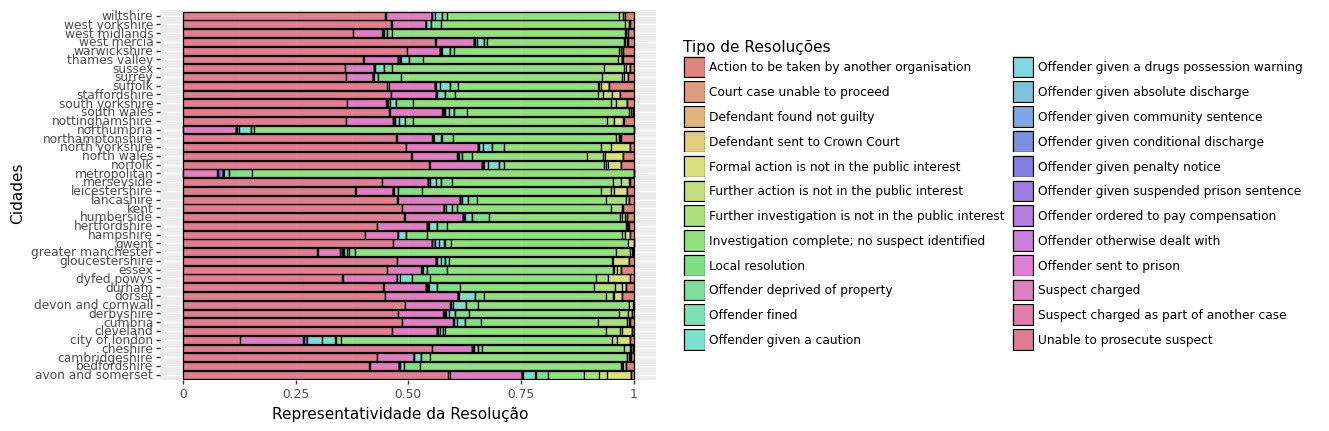

<ggplot: (101059979701)>

In [43]:
(ggplot(outcomes2, aes(x = 'cidade', y = 'percent', fill = 'Outcome type')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Cidades', y = 'Representatividade da Resolução', fill = 'Tipo de Resoluções') +
                       coord_flip())

In [44]:
outcomes_charged = outcomes2.loc[outcomes2['Outcome type'] == 'Suspect charged']

In [45]:
outcomes_charged

,cidade,Outcome type,count,total,percent
20,avon and somerset,Suspect charged,37204,234022,0.158977
42,bedfordshire,Suspect charged,9492,145173,0.065384
64,cambridgeshire,Suspect charged,15505,191751,0.080860
87,cheshire,Suspect charged,20791,232995,0.089234
107,city of london,Suspect charged,2197,15747,0.139519
130,cleveland,Suspect charged,20405,203595,0.100223
153,cumbria,Suspect charged,12680,111071,0.114161
176,derbyshire,Suspect charged,23738,235029,0.101000
197,devon and cornwall,Suspect charged,23654,235954,0.100248
220,dorset,Suspect charged,33713,209416,0.160986


<BarContainer object of 42 artists>

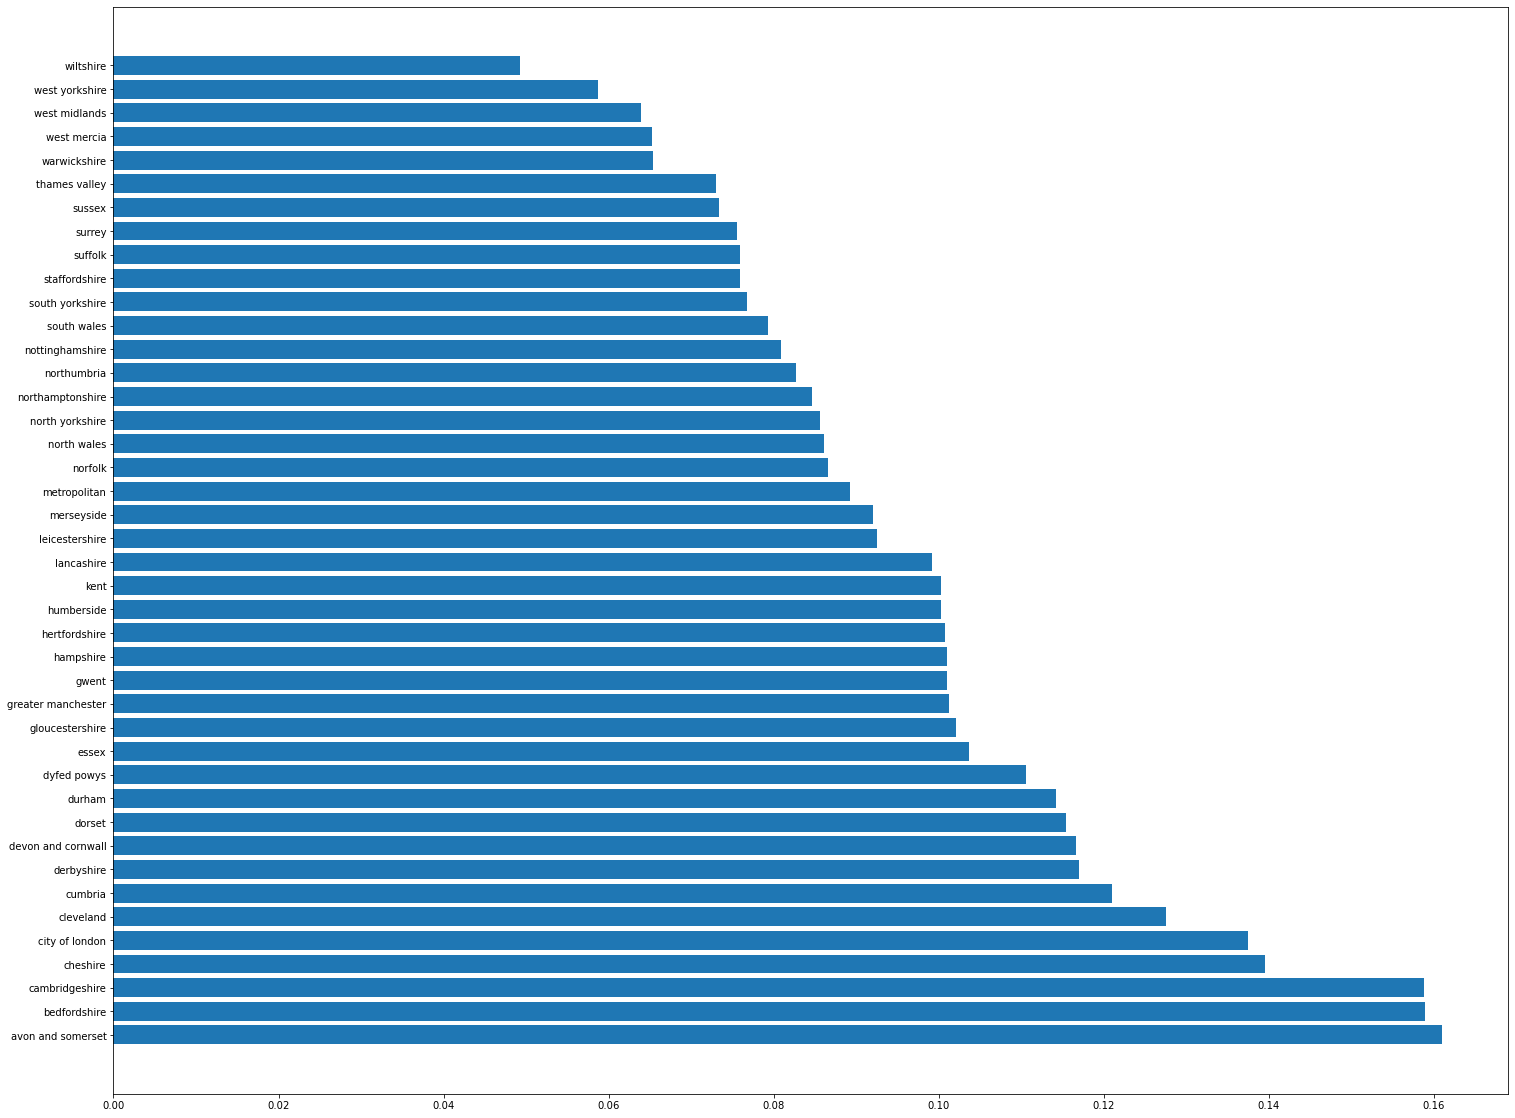

In [46]:
fig = plt.figure(figsize = (25, 20))
plt.barh(outcomes_charged.cidade, outcomes_charged.percent.sort_values(ascending = False))

- Conseguimos observar que as cidades com mais suspeitos acusados são as cidades de: avon and somerset, bedfordshire e cambridgeshire, seguidos de perto por cheshire e a cidade de londres. Com as conclusões feitas anteriormentes sabemos que não só a cidade de londres tem uma baixa quantidade de crimes para resolver mas também tem uma porcentagem relativamente alta de suspeitos indiciados.
- Ainda assim o gráfico com todas as resoluções de crimes se faz dificil de se ler, assim o grupo decidiu agrupar as resoluções das seguinte forma:
    - Multa/Aviso: 'Offender deprived of property', 'Offender fined', 'Offender given a caution', 'Offender given a drugs possession warning', 'Offender given penalty notice', 'Offender ordered to pay compensation', 'Offender otherwise dealt with'
    - Solto/Não Identificado: 'Action to be taken by another organisation', 'Court case unable to proceed', 'Defendant found not guilty', 'Formal action is not in the public interest', 'Further action is not in the public interest', 'Further investigation is not in the public interest',  'Investigation complete; no suspect identified', 'Local resolution', 'Unable to prosecute suspect', 'Offender given absolute discharge'
    - Preso/Condenado: 'Defendant sent to Crown Court', 'Offender given community sentence', 'Offender given conditional discharge', 'Offender given suspended prison sentence', 'Offender sent to prison', 'Suspect charged', 'Suspect charged as part of another case'
- Com esse agrupamento em 3 grandes grupos de resoluções pretedemos ter uma análise mais completa de quais cidade têm maior impunidade e quais cidades têm uma maior resolução completa de crimes

In [47]:
multa_aviso = ['Offender deprived of property', 'Offender fined', 'Offender given a caution', 
               'Offender given a drugs possession warning', 'Offender given penalty notice',
               'Offender ordered to pay compensation', 'Offender otherwise dealt with']

solto_nid = ['Action to be taken by another organisation', 'Court case unable to proceed', 
             'Defendant found not guilty', 'Formal action is not in the public interest', 
             'Further action is not in the public interest', 'Further investigation is not in the public interest', 
             'Investigation complete; no suspect identified', 'Local resolution', 'Unable to prosecute suspect', 
             'Offender given absolute discharge']

preso_cond = [ 'Defendant sent to Crown Court', 'Offender given community sentence', 
              'Offender given conditional discharge', 'Offender given suspended prison sentence', 
              'Offender sent to prison', 'Suspect charged', 'Suspect charged as part of another case']

In [48]:
outcomes2.head()

,cidade,Outcome type,count,total,percent
0,avon and somerset,Action to be taken by another organisation,1375,234022,0.005876
1,avon and somerset,Court case unable to proceed,21,234022,0.000090
2,avon and somerset,Defendant found not guilty,16,234022,0.000068
3,avon and somerset,Defendant sent to Crown Court,13,234022,0.000056
4,avon and somerset,Formal action is not in the public interest,12336,234022,0.052713


In [49]:
outcomes2 = outcomes2.rename(columns = {'Outcome type':'outcome'})

In [50]:
outcomes3 = outcomes2.assign(outcome_new = np.select([outcomes2.outcome.isin(multa_aviso), 
                                                      outcomes2.outcome.isin(solto_nid),
                                                      outcomes2.outcome.isin(preso_cond)],
                                                     ['Multa/Aviso', 'Solto/Não Identificado', 'Preso/Condenado']))
outcomes3

,cidade,outcome,count,total,percent,outcome_new
0,avon and somerset,Action to be taken by another organisation,1375,234022,0.005876,Solto/Não Identificado
1,avon and somerset,Court case unable to proceed,21,234022,0.000090,Solto/Não Identificado
2,avon and somerset,Defendant found not guilty,16,234022,0.000068,Solto/Não Identificado
3,avon and somerset,Defendant sent to Crown Court,13,234022,0.000056,Preso/Condenado
4,avon and somerset,Formal action is not in the public interest,12336,234022,0.052713,Solto/Não Identificado
...,...,...,...,...,...,...
938,wiltshire,Offender otherwise dealt with,2,108764,0.000018,Multa/Aviso
939,wiltshire,Offender sent to prison,27,108764,0.000248,Preso/Condenado
940,wiltshire,Suspect charged,10982,108764,0.100971,Preso/Condenado
941,wiltshire,Suspect charged as part of another case,181,108764,0.001664,Preso/Condenado


In [51]:
outcomes3 = outcomes3.drop(['outcome','percent'], axis = 1)
outcomes3

,cidade,count,total,outcome_new
0,avon and somerset,1375,234022,Solto/Não Identificado
1,avon and somerset,21,234022,Solto/Não Identificado
2,avon and somerset,16,234022,Solto/Não Identificado
3,avon and somerset,13,234022,Preso/Condenado
4,avon and somerset,12336,234022,Solto/Não Identificado
...,...,...,...,...
938,wiltshire,2,108764,Multa/Aviso
939,wiltshire,27,108764,Preso/Condenado
940,wiltshire,10982,108764,Preso/Condenado
941,wiltshire,181,108764,Preso/Condenado


In [52]:
outcomes3.columns

Index(['cidade', 'count', 'total', 'outcome_new'], dtype='object')

In [53]:
%time
intermed = outcomes3.groupby(['cidade','outcome_new']).sum().reset_index()
intermed = intermed.drop(['total'], axis = 1)
outcomes_agg = intermed.merge(total_crime, left_on = 'cidade', right_on = 'cidade', how = 'left')
outcomes_agg

CPU times: total: 0 ns
Wall time: 0 ns


,cidade,outcome_new,count,total
0,avon and somerset,Multa/Aviso,6802,234022
1,avon and somerset,Preso/Condenado,38782,234022
2,avon and somerset,Solto/Não Identificado,188438,234022
3,bedfordshire,Multa/Aviso,1524,145173
4,bedfordshire,Preso/Condenado,9847,145173
...,...,...,...,...
121,west yorkshire,Preso/Condenado,61588,796932
122,west yorkshire,Solto/Não Identificado,727729,796932
123,wiltshire,Multa/Aviso,2438,108764
124,wiltshire,Preso/Condenado,11254,108764


In [54]:
%time
outcomes_agg = outcomes_agg.assign(percent = outcomes_agg['count'].astype(int)/outcomes_agg.total.astype(int))
outcomes_agg

CPU times: total: 0 ns
Wall time: 0 ns


,cidade,outcome_new,count,total,percent
0,avon and somerset,Multa/Aviso,6802,234022,0.029066
1,avon and somerset,Preso/Condenado,38782,234022,0.165719
2,avon and somerset,Solto/Não Identificado,188438,234022,0.805215
3,bedfordshire,Multa/Aviso,1524,145173,0.010498
4,bedfordshire,Preso/Condenado,9847,145173,0.067829
...,...,...,...,...,...
121,west yorkshire,Preso/Condenado,61588,796932,0.077281
122,west yorkshire,Solto/Não Identificado,727729,796932,0.913163
123,wiltshire,Multa/Aviso,2438,108764,0.022416
124,wiltshire,Preso/Condenado,11254,108764,0.103472


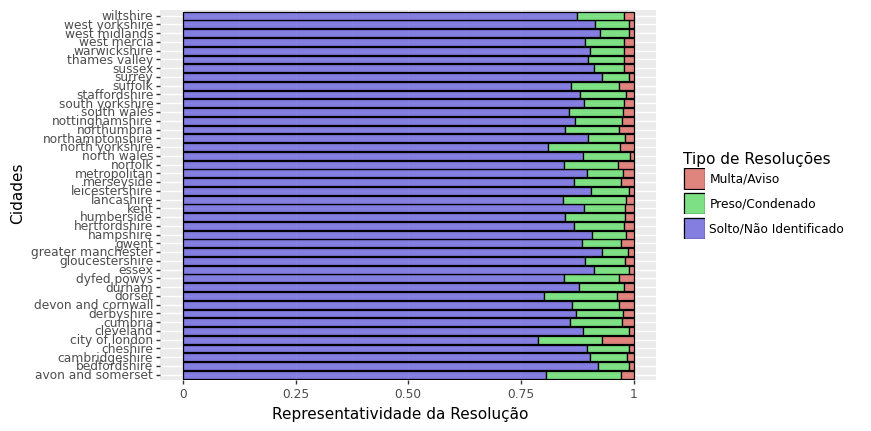

<ggplot: (101059329070)>

In [55]:
(ggplot(outcomes_agg, aes(x = 'cidade', y = 'percent', fill = 'outcome_new')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Cidades', y = 'Representatividade da Resolução', fill = 'Tipo de Resoluções') +
                       coord_flip())

- Novamente o grupo reparou a grande porcentagem de impunidade presente na sociedade britância.

In [56]:
presos = outcomes_agg.loc[outcomes_agg.outcome_new == 'Preso/Condenado']
presos

,cidade,outcome_new,count,total,percent
1,avon and somerset,Preso/Condenado,38782,234022,0.165719
4,bedfordshire,Preso/Condenado,9847,145173,0.067829
7,cambridgeshire,Preso/Condenado,15954,191751,0.083202
10,cheshire,Preso/Condenado,21321,232995,0.091508
13,city of london,Preso/Condenado,2253,15747,0.143075
16,cleveland,Preso/Condenado,20818,203595,0.102252
19,cumbria,Preso/Condenado,12809,111071,0.115323
22,derbyshire,Preso/Condenado,24230,235029,0.103094
25,devon and cornwall,Preso/Condenado,24408,235954,0.103444
28,dorset,Preso/Condenado,34132,209416,0.162987


<BarContainer object of 42 artists>

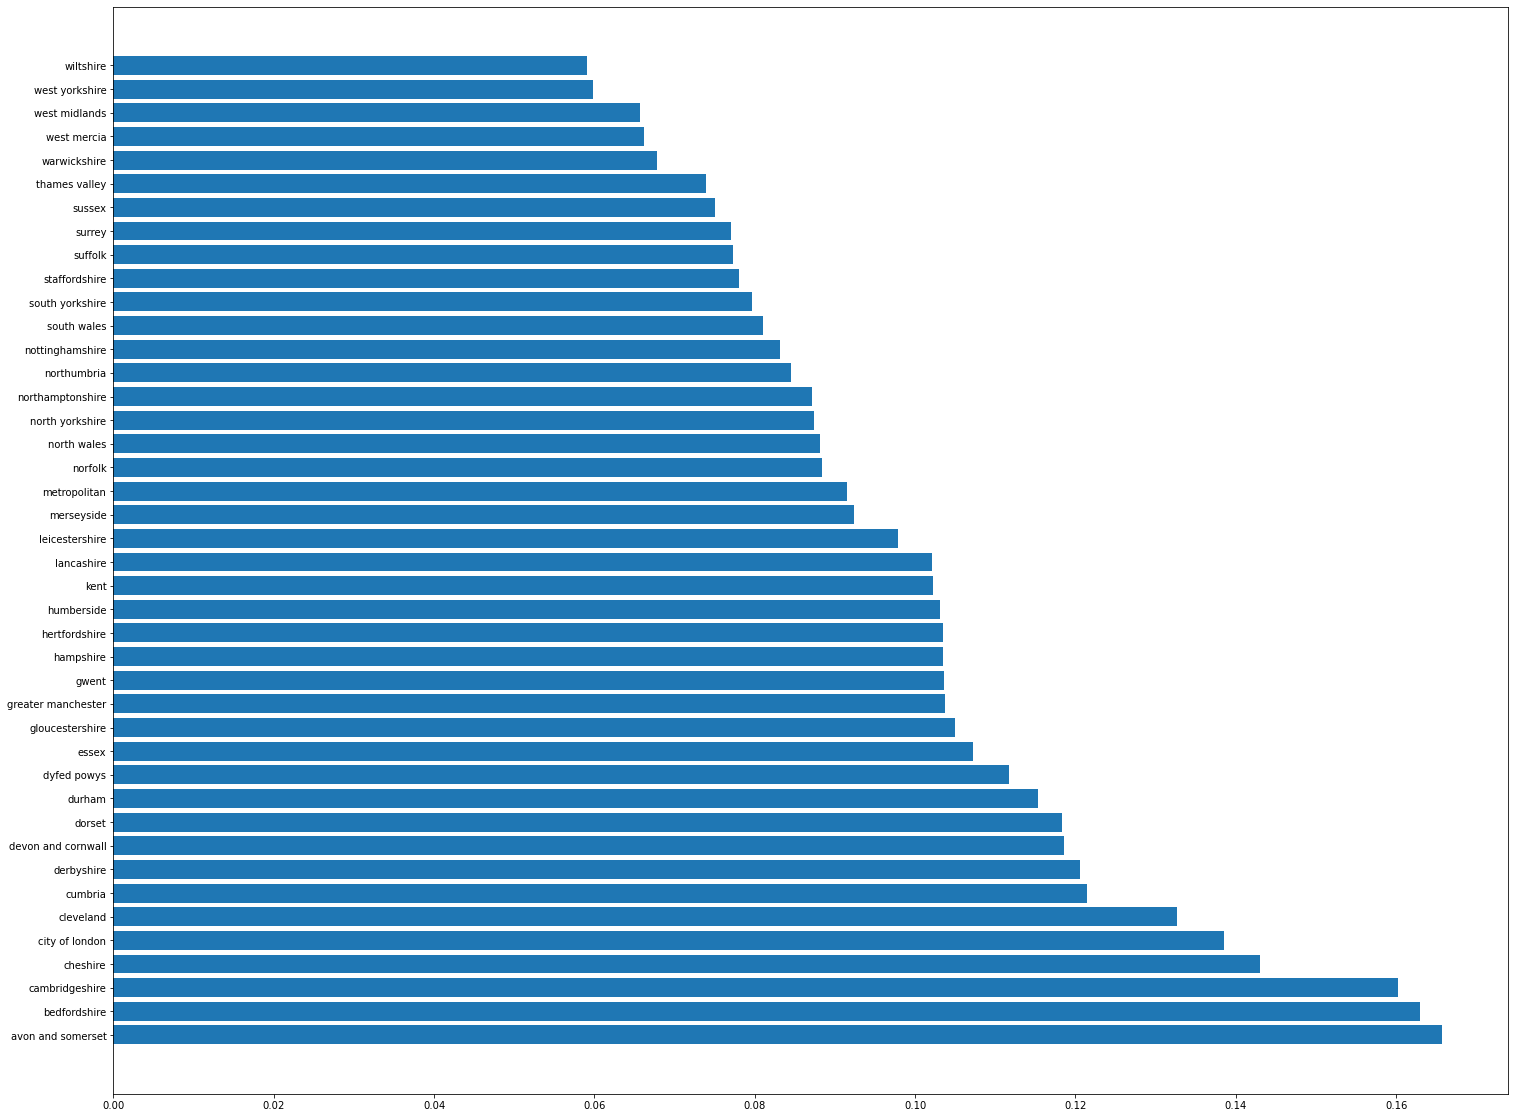

In [57]:
fig = plt.figure(figsize = (25, 20))
plt.barh(presos.cidade, presos.percent.sort_values(ascending = False))

- De novo as cidades com maior número percentual de condenação ou processamento são: avon and somerset, bedfordshire e cambridgeshire, seguidos de perto por cheshire e a cidade de londres.

In [58]:
total_crime.loc[total_crime.cidade.isin(['city of london', 'cheshire', 'cambridgeshire', 'bedfordshire', 
                                         'avon and somerset'])]

,cidade,total
0,city of london,15747
8,bedfordshire,145173
15,cambridgeshire,191751
20,cheshire,232995
21,avon and somerset,234022


# Conclusão

Para uma eventual visita ou mudança o grupo indica a cidade de londres e bedfordshire que não só têm um baixo número de crimes reportados também têm um alto indice de resolução "satisfatória" dos crimes com os responsáveis sendo resposabilizados pelas infrações.

In [59]:
client.close()